In [1]:
import numpy as np
import pandas as pd
import os

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score

from sklearn.datasets import fetch_openml
from keras.utils import np_utils

from matplotlib import pyplot as plt
from matplotlib.image import imread
import seaborn as sns
%matplotlib inline
plt.style.use('default')

from itertools import cycle

import pickle

Using TensorFlow backend.
e:\Users\user\anaconda3\envs\metis\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
e:\Users\user\anaconda3\envs\metis\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
e:\Users\user\anaconda3\envs\metis\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
e:\Users\user\anaconda3\envs\metis\lib\site-packag

In [4]:
file_list = pickle.load( open( "file_list", "rb" ) )

In [5]:
len(file_list)

171096

In [6]:
file_list_green = pickle.load( open( "file_list_green", "rb" ) )

In [7]:
file_list_green[0:5]

['..\\..\\Metis_Project5_data\\test\\00008af0-bad0-11e8-b2b8-ac1f6b6435d0_green.png',
 '..\\..\\Metis_Project5_data\\test\\0000a892-bacf-11e8-b2b8-ac1f6b6435d0_green.png',
 '..\\..\\Metis_Project5_data\\test\\0006faa6-bac7-11e8-b2b7-ac1f6b6435d0_green.png',
 '..\\..\\Metis_Project5_data\\test\\0008baca-bad7-11e8-b2b9-ac1f6b6435d0_green.png',
 '..\\..\\Metis_Project5_data\\test\\000cce7e-bad4-11e8-b2b8-ac1f6b6435d0_green.png']

In [8]:
len(file_list_green)

42774

In [9]:
plt.style.use('default')

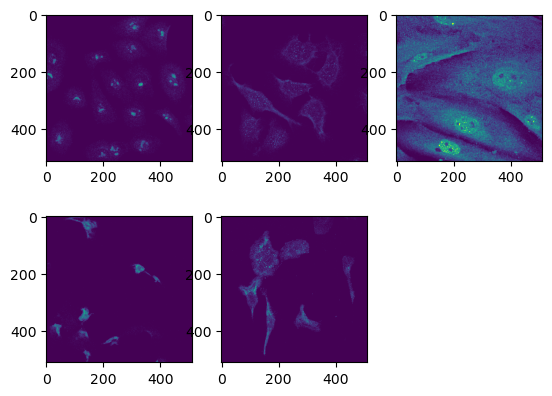

In [10]:
for ix, name in enumerate(file_list_green[:5]):
    plt.subplot(230 + 1 + ix)
    image = imread(name)
    plt.imshow(image)
plt.show()
    

In [11]:
file_list_green_train = pickle.load( open( "file_list_green_train", "rb" ) )

In [12]:
file_list_green_train[0:5]

['..\\..\\Metis_Project5_data\\train\\00070df0-bbc3-11e8-b2bc-ac1f6b6435d0_green.png',
 '..\\..\\Metis_Project5_data\\train\\000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0_green.png',
 '..\\..\\Metis_Project5_data\\train\\000a9596-bbc4-11e8-b2bc-ac1f6b6435d0_green.png',
 '..\\..\\Metis_Project5_data\\train\\000c99ba-bba4-11e8-b2b9-ac1f6b6435d0_green.png',
 '..\\..\\Metis_Project5_data\\train\\001838f8-bbca-11e8-b2bc-ac1f6b6435d0_green.png']

In [13]:
len(file_list_green_train)

31072

In [14]:
df_train = pd.read_csv('..\\..\\Metis_Project5_data\\train.csv')

In [15]:
df_train.head()

,Id,Target
0,00070df0-bbc3-11e8-b2bc-ac1f6b6435d0,16 0
1,000a6c98-bb9b-11e8-b2b9-ac1f6b6435d0,7 1 2 0
2,000a9596-bbc4-11e8-b2bc-ac1f6b6435d0,5
3,000c99ba-bba4-11e8-b2b9-ac1f6b6435d0,1
4,001838f8-bbca-11e8-b2bc-ac1f6b6435d0,18


In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31072 entries, 0 to 31071
Data columns (total 2 columns):
Id        31072 non-null object
Target    31072 non-null object
dtypes: object(2)
memory usage: 485.6+ KB


In [19]:
# Look at images with single protein in images
for i in range(28):
    print(i, len(df_train[df_train['Target']==f'{i}']))

0 2414
1 271
2 808
3 654
4 1077
5 983
6 622
7 1163
8 31
9 17
10 0
11 601
12 232
13 157
14 484
15 0
16 27
17 0
18 314
19 522
20 98
21 1058
22 213
23 1653
24 122
25 1470
26 134
27 1


Splitting up dataframes by protein with about 1000 or more images

In [20]:
df_0 = df_train[df_train['Target']=='0']

In [21]:
df_4 = df_train[df_train['Target']=='4']

In [22]:
df_5 = df_train[df_train['Target']=='5']

In [23]:
df_7 = df_train[df_train['Target']=='7']

In [24]:
df_21 = df_train[df_train['Target']=='21']

In [25]:
df_23 = df_train[df_train['Target']=='23']

In [26]:
df_25 = df_train[df_train['Target']=='25']

In [27]:
list_df = [df_0, df_4, df_5, df_7, df_21, df_23, df_25]

In [28]:
list_name_df = ['df_0', 'df_4', 'df_5', 'df_7', 'df_21', 'df_23', 'df_25']

In [29]:
path = '..\\..\\Metis_Project5_data\\train\\'
suffix = '_green.png'

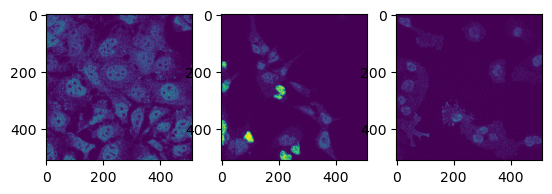

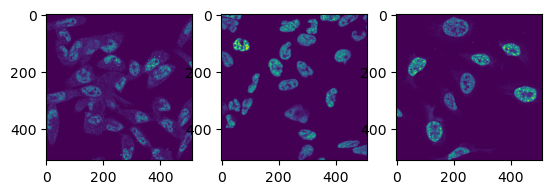

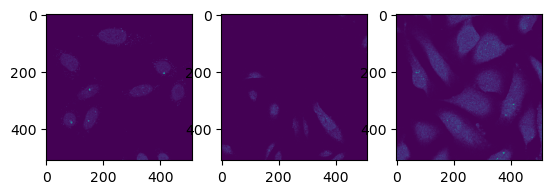

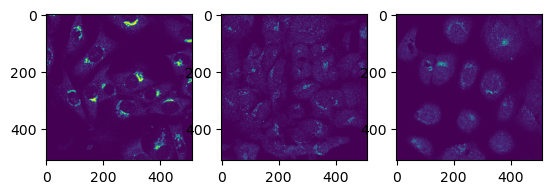

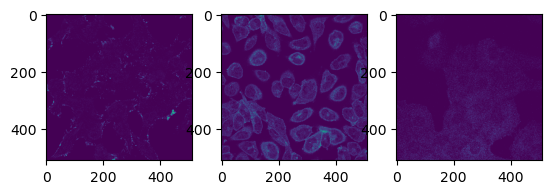

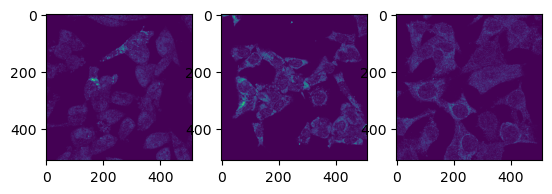

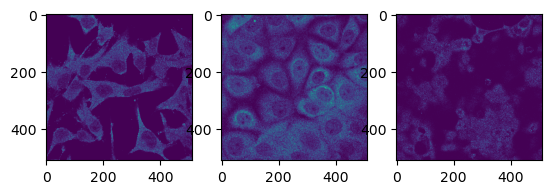

In [30]:
for my_df in list_df:
    for ix, name in enumerate(my_df['Id'].head(3)):
        plt.subplot(230 + 1 + ix)
        image = imread(path + name + suffix)
        plt.imshow(image)
    plt.show()

In [31]:
def make_array(my_df):
    '''
    This function takes a dataframe and returns a flattened numpy array.
    
    Input: pandas dataframe
    Output: flattened numpy array
    
    '''
    my_list = []
    path = '..\\..\\Metis_Project5_data\\train\\'
    suffix = '_green.png'
    
    for name in my_df['Id']:
        image = imread(path + name + suffix)
        im_flat = image.flatten()
        my_list.append(im_flat)
    
    return np.array(my_list)
    
    
    

In [150]:
ar_4 = make_array(df_4)

In [151]:
ar_4.shape

(1077, 262144)

In [152]:
y_4 = np.zeros(len(ar_4))

In [153]:
y_4

array([0., 0., 0., ..., 0., 0., 0.])

In [154]:
len(y_4)

1077

In [155]:
ar_25 = make_array(df_25)

In [156]:
ar_25.shape

(1470, 262144)

In [157]:
y_25 = np.ones(len(ar_25))

In [158]:
y_25

array([1., 1., 1., ..., 1., 1., 1.])

In [159]:
len(y_25)

1470

In [160]:
# Create target numpy array for binary classification
y = np.concatenate([y_4, y_25])

In [161]:
y

array([0., 0., 0., ..., 1., 1., 1.])

In [162]:
len(y)

2547

In [163]:
X = np.concatenate([ar_4, ar_25])

In [164]:
X.shape

(2547, 262144)

In [165]:
X_centered = X - X.mean()

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.25, random_state = 42)

In [171]:
X_train.shape

(1910, 262144)

In [167]:
pca = PCA(n_components=1000)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=1000, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

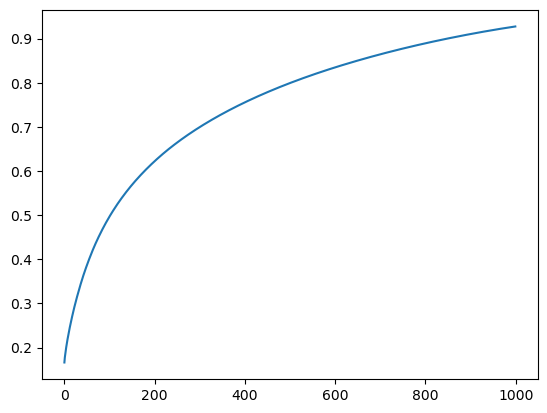

In [70]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

#### 500 components appeared to account for about 80% of the variation based on the graph above

In [71]:
pca = PCA(n_components=500)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=500, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [168]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [169]:
X_train_pca.shape

(1910, 1000)

In [74]:
rfc = RandomForestClassifier()
rfc.fit(X_train_pca, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

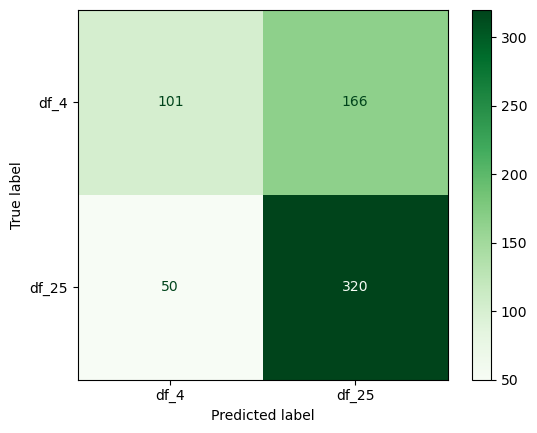

In [75]:
disp = plot_confusion_matrix(rfc, X_test_pca, y_test,
                                 display_labels=['df_4', 'df_25'],
                                 cmap=plt.cm.Greens, values_format = '.5g')

In [85]:
print('Metrics on train')
print('Accuracy Score: ', accuracy_score(y_train, rfc.predict(X_train_pca) ))
print('Precision Score: ', precision_score(y_train, rfc.predict(X_train_pca) ))
print('Recall Score: ', recall_score(y_train, rfc.predict(X_train_pca) ))
print('F1 Score: ', f1_score(y_train, rfc.predict(X_train_pca) ))

Metrics on train
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0


In [84]:
print('Test metrics')
print('Accuracy Score: ', accuracy_score(y_test, rfc.predict(X_test_pca) ))
print('Precision Score: ', precision_score(y_test, rfc.predict(X_test_pca) ))
print('Recall Score: ', recall_score(y_test, rfc.predict(X_test_pca) ))
print('F1 Score: ', f1_score(y_test, rfc.predict(X_test_pca) ))

Test metrics
Accuracy Score:  0.6609105180533752
Precision Score:  0.6584362139917695
Recall Score:  0.8648648648648649
F1 Score:  0.7476635514018692


In [91]:
len(y_test)

637

In [93]:
print('Dummy metrics')
print('Accuracy Score: ', accuracy_score(y_test, np.ones(len(y_test)) ))
print('Precision Score: ', precision_score(y_test, np.ones(len(y_test)) ))
print('Recall Score: ', recall_score(y_test, np.ones(len(y_test)) ))
print('F1 Score: ', f1_score(y_test, np.ones(len(y_test))) )

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


In [94]:
def get_X_y_train_test(df_a, df_b):
    '''
    This function takes in two pandas dataframes.
    It returns four numpy arrays suitable for doing PCA and random forest 
    using make_array and train_test_split.
    
    Input: two pandas dataframes
    Output: four train_test_split numpy arrays
    
    '''
    
    ar_a = make_array(df_a)
    y_a = np.zeros(len(ar_a))

    ar_b = make_array(df_b)  
    y_b = np.ones(len(ar_b))
    
    
    X = np.concatenate([ar_a, ar_b])
    X_centered = X - X.mean()
    
    
    y = np.concatenate([y_a, y_b])
    
    X_train, X_test, y_train, y_test = train_test_split(X_centered, y, test_size=0.25, random_state = 42)
    
    return X_train, X_test, y_train, y_test

In [95]:
X_train1, X_test1, y_train1, y_test1 = get_X_y_train_test(df_4, df_25)

In [129]:
def run_rf(X_train, X_test, y_train, y_test, max_depth=None, n_estimators=100):
    '''
    This function takes in four numpy arrays that were output from the get_X_y_train_test function.
    It performs PCA and then runs a random forest model with the components from PCA.
    It displays metrics for train, test, and dummy models.
    It returns the train and test PCA arrays.
    
    Input: four numpy arrays that were output from the get_X_y_train_test function
    Output: metrics and train and test PCA arrays
    
    '''
    
    pca = PCA(n_components=500)
    pca.fit(X_train)

    X_train_pca = pca.transform(X_train)
    X_test_pca = pca.transform(X_test)
    
    rfc = RandomForestClassifier(max_depth =max_depth, n_estimators=n_estimators, max_features=200 )
    rfc.fit(X_train_pca, y_train)
    
    plot_confusion_matrix(rfc, X_test_pca, y_test,
                                 display_labels=['df_a', 'df_b'],
                                 cmap=plt.cm.Greens, values_format = '.5g')
    
    y_train_pred = rfc.predict(X_train_pca)
    print('Metrics on train')
    print('Accuracy Score: ', accuracy_score(y_train, y_train_pred ))
    print('Precision Score: ', precision_score(y_train, y_train_pred ))
    print('Recall Score: ', recall_score(y_train, y_train_pred ))
    print('F1 Score: ', f1_score(y_train, y_train_pred ))
    
    y_test_pred = rfc.predict(X_test_pca)
    print('\nMetrics on Test')
    print('Accuracy Score: ', accuracy_score(y_test, y_test_pred ))
    print('Precision Score: ', precision_score(y_test, y_test_pred ))
    print('Recall Score: ', recall_score(y_test, y_test_pred ))
    print('F1 Score: ', f1_score(y_test, y_test_pred ))
    
    print('\nDummy metrics')
    print('Accuracy Score: ', accuracy_score(y_test, np.ones(len(y_test)) ))
    print('Precision Score: ', precision_score(y_test, np.ones(len(y_test)) ))
    print('Recall Score: ', recall_score(y_test, np.ones(len(y_test)) ))
    print('F1 Score: ', f1_score(y_test, np.ones(len(y_test))) )
    
    return X_train_pca, X_test_pca

Metrics on train
Accuracy Score:  0.9984293193717277
Precision Score:  0.9972801450589301
Recall Score:  1.0
F1 Score:  0.9986382206082615

Metrics on Test
Accuracy Score:  0.7158555729984302
Precision Score:  0.7142857142857143
Recall Score:  0.8513513513513513
F1 Score:  0.7768187422934648

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590422e+00, -3.9636261e+00, -3.8725600e+00, ...,
         -1.2882577e-01,  5.6215264e-02,  2.4668930e-01],
        [ 7.5333359e+01, -1.4135652e+00,  1.0309152e+01, ...,
          2.4387704e-01,  1.3826504e-01,  8.2939106e-01],
        [ 9.7879341e+01,  1.2840087e+00, -1.9614077e+01, ...,
          8.5730150e-02,  1.2769340e-02,  2.7554110e-01],
        ...,
        [-2.0550764e-01,  1.0660332e+01,  8.1803703e+00, ...,
         -2.9300779e-01, -5.2311945e-01,  1.2773542e+00],
        [ 1.2308114e+01, -2.4969966e+00, -1.8133196e+00, ...,
          1.6431371e+00,  1.7524141e+00, -1.9118183e+00],
        [-1.1036064e-01, -1.8688393e+01,  3.8715625e+00, ...,
          8.7587053e-01,  1.4700990e+00,  9.9349625e-02]], dtype=float32),
 array([[-1.5165131e+01,  5.8113480e-01,  1.3378645e-01, ...,
          1.9393422e-01, -1.8100952e-01,  2.2445671e-01],
        [-1.4266366e-02, -2.5691049e+00,  3.0586047e+00, ...,
          6.3079882e-01, -1.9333766e-01, -4.4216082e-02],
        [-

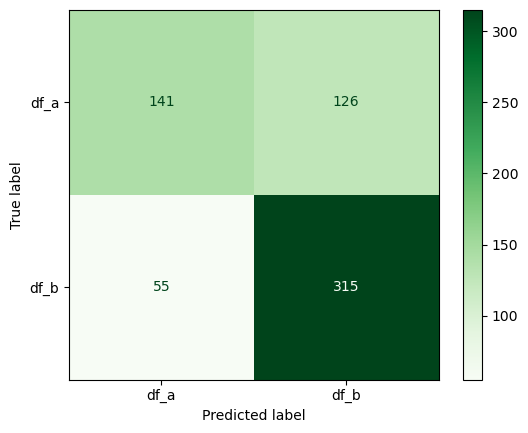

In [128]:
### Set max_features to 200
### This turned out to be my best model for random forest, and it wasn't great
run_rf(X_train1, X_test1, y_train1, y_test1, 15, 100)

#### Below are runs experimenting with hyperparameter tuning

Metrics on train
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0
Metrics on Test
Accuracy Score:  0.6828885400313972
Precision Score:  0.675
Recall Score:  0.8756756756756757
F1 Score:  0.7623529411764706
Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.35903931e+00, -3.96363521e+00, -3.87255383e+00, ...,
          1.55479148e-01,  6.16720244e-02,  1.99423619e-02],
        [ 7.53333435e+01, -1.41352081e+00,  1.03092213e+01, ...,
          9.67785537e-01,  3.93862456e-01,  1.57390571e+00],
        [ 9.78793106e+01,  1.28394485e+00, -1.96141205e+01, ...,
          4.29376602e-01, -3.87711048e-01, -2.11884618e-01],
        ...,
        [-2.05508113e-01,  1.06603451e+01,  8.18031883e+00, ...,
         -7.20592290e-02,  7.81488568e-02, -2.66864836e-01],
        [ 1.23081141e+01, -2.49700022e+00, -1.81330836e+00, ...,
         -1.59767616e+00, -8.06553423e-01,  2.09369349e+00],
        [-1.10363975e-01, -1.86883621e+01,  3.87160158e+00, ...,
          1.86479354e+00,  7.87252784e-01, -1.07300055e+00]], dtype=float32),
 array([[-1.5165124e+01,  5.8112812e-01,  1.3377984e-01, ...,
          9.7390622e-02, -2.1076739e-01,  3.8555178e-01],
        [-1.4266087e-02, -2.5690999e+00,  3.0585887e+00, ...,
          2.0405358e-02, -9.2888

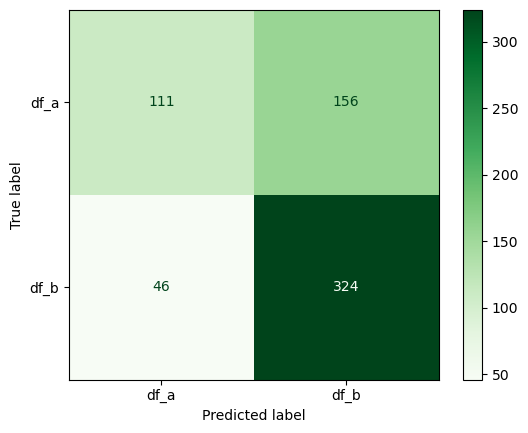

In [101]:
run_rf(X_train1, X_test1, y_train1, y_test1)

Metrics on train
Accuracy Score:  0.6136125654450262
Precision Score:  0.5984766050054406
Recall Score:  1.0
F1 Score:  0.7488087134104833
Metrics on Test
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893
Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590393e+00, -3.9636424e+00, -3.8725479e+00, ...,
         -1.5376279e-01, -7.8370661e-02, -1.5062600e-01],
        [ 7.5333351e+01, -1.4135109e+00,  1.0309208e+01, ...,
         -4.8638672e-02,  1.6235152e-01,  3.3931503e-01],
        [ 9.7879326e+01,  1.2838974e+00, -1.9614080e+01, ...,
         -7.0015752e-01, -2.7834842e-01, -1.9482730e-01],
        ...,
        [-2.0551443e-01,  1.0660371e+01,  8.1803246e+00, ...,
         -1.0479958e+00, -2.7340975e-01,  2.2581232e-01],
        [ 1.2308115e+01, -2.4970062e+00, -1.8133011e+00, ...,
          3.8447040e-01,  1.2332038e+00,  8.0238873e-01],
        [-1.1035790e-01, -1.8688374e+01,  3.8716149e+00, ...,
         -5.9813362e-01,  8.9600891e-01, -1.1453534e+00]], dtype=float32),
 array([[-1.51651287e+01,  5.81131399e-01,  1.33780956e-01, ...,
          1.82099342e-01, -1.48893431e-01,  8.52008685e-02],
        [-1.42663838e-02, -2.56909609e+00,  3.05859303e+00, ...,
          5.53894758e-01, -4.98671979e-02, -1.58004486e-03]

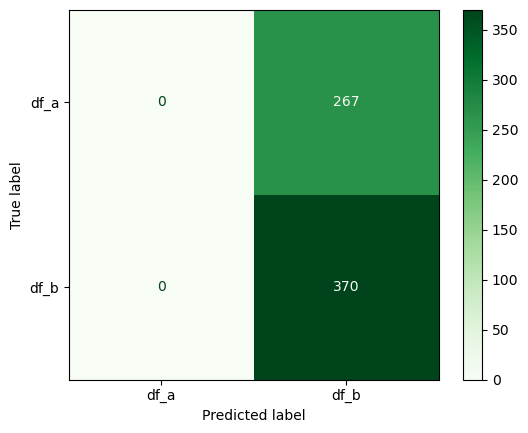

In [102]:
run_rf(X_train1, X_test1, y_train1, y_test1, 3)

Metrics on train
Accuracy Score:  0.9821989528795811
Precision Score:  0.9700176366843033
Recall Score:  1.0
F1 Score:  0.9847806624888092
Metrics on Test
Accuracy Score:  0.6781789638932496
Precision Score:  0.6571428571428571
Recall Score:  0.9324324324324325
F1 Score:  0.770949720670391
Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590422e+00, -3.9636266e+00, -3.8725562e+00, ...,
         -1.7610705e-01,  1.0857932e-01,  2.8658822e-02],
        [ 7.5333351e+01, -1.4135673e+00,  1.0309173e+01, ...,
          9.0040952e-01, -1.3107234e+00,  1.0043491e-01],
        [ 9.7879333e+01,  1.2839607e+00, -1.9614075e+01, ...,
          1.1661573e-01, -9.2557989e-02,  2.2115579e-02],
        ...,
        [-2.0550625e-01,  1.0660330e+01,  8.1803417e+00, ...,
          2.2483903e-01,  1.5193674e-01, -1.0666517e+00],
        [ 1.2308115e+01, -2.4970045e+00, -1.8133163e+00, ...,
          6.0419834e-01, -1.0481806e+00, -3.9321488e-01],
        [-1.1036700e-01, -1.8688362e+01,  3.8715744e+00, ...,
          1.3913743e+00, -4.5931467e-01, -9.3732551e-02]], dtype=float32),
 array([[-1.5165132e+01,  5.8113420e-01,  1.3379048e-01, ...,
          2.9392105e-01, -2.3919755e-01,  2.3602740e-01],
        [-1.4266180e-02, -2.5690985e+00,  3.0586019e+00, ...,
          8.2957900e-01,  6.7119855e-01,  5.6720710e-01],
        [-

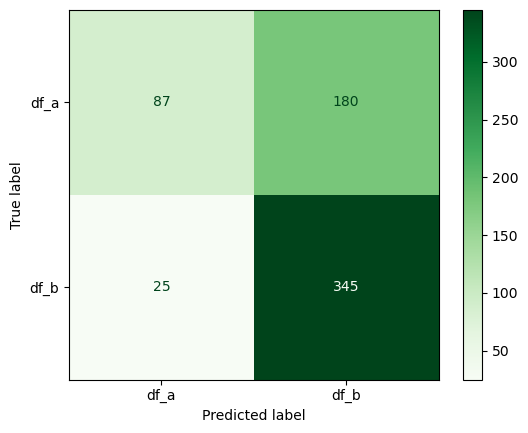

In [103]:
run_rf(X_train1, X_test1, y_train1, y_test1, 10)

Metrics on train
Accuracy Score:  0.9785340314136126
Precision Score:  0.9640666082383874
Recall Score:  1.0
F1 Score:  0.9817045961624274

Metrics on Test
Accuracy Score:  0.6907378335949764
Precision Score:  0.6653919694072657
Recall Score:  0.9405405405405406
F1 Score:  0.7793952967525195

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590422e+00, -3.9636397e+00, -3.8725407e+00, ...,
          2.7108285e-01,  3.2682914e-01, -3.7648275e-02],
        [ 7.5333374e+01, -1.4135047e+00,  1.0309157e+01, ...,
         -9.7767013e-01,  3.9532045e-01,  5.9277850e-01],
        [ 9.7879341e+01,  1.2838728e+00, -1.9614059e+01, ...,
          4.6638545e-01, -1.5906173e-01,  1.0711241e-01],
        ...,
        [-2.0550892e-01,  1.0660356e+01,  8.1803179e+00, ...,
          3.4386462e-01, -3.9077389e-01, -9.8357141e-01],
        [ 1.2308114e+01, -2.4970059e+00, -1.8133117e+00, ...,
         -2.0806208e+00, -1.7079747e-01,  3.2782409e-01],
        [-1.1035937e-01, -1.8688362e+01,  3.8716416e+00, ...,
         -7.8270262e-01,  1.0678660e+00,  5.6103803e-02]], dtype=float32),
 array([[-1.51651325e+01,  5.81130624e-01,  1.33786365e-01, ...,
          3.46426070e-01, -1.11200058e+00, -1.25086792e-02],
        [-1.42654050e-02, -2.56909513e+00,  3.05860996e+00, ...,
         -1.74080774e-01,  2.51753777e-01, -5.25029480e-01]

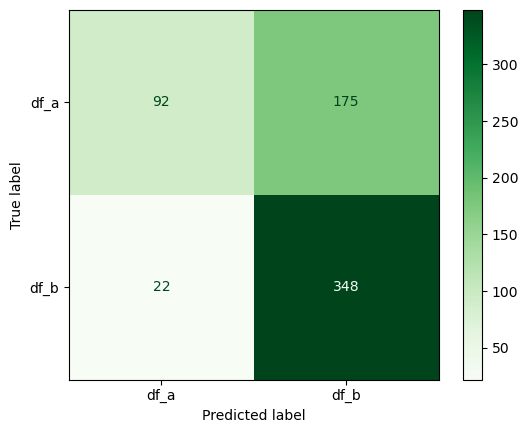

In [105]:
run_rf(X_train1, X_test1, y_train1, y_test1, 10, 150)

Metrics on train
Accuracy Score:  0.9759162303664921
Precision Score:  0.9598603839441536
Recall Score:  1.0
F1 Score:  0.9795191451469278

Metrics on Test
Accuracy Score:  0.6844583987441131
Precision Score:  0.6621880998080614
Recall Score:  0.9324324324324325
F1 Score:  0.7744107744107744

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590403e+00, -3.9636242e+00, -3.8725564e+00, ...,
         -2.0046011e-01, -1.2233644e-01,  6.3935652e-02],
        [ 7.5333351e+01, -1.4135611e+00,  1.0309121e+01, ...,
          2.0674367e-01,  2.6345456e-01, -7.9973632e-01],
        [ 9.7879341e+01,  1.2839829e+00, -1.9613989e+01, ...,
          2.0683151e-01,  3.1856397e-01,  3.9057761e-01],
        ...,
        [-2.0551282e-01,  1.0660324e+01,  8.1803627e+00, ...,
          7.7090478e-01, -3.3766356e-01, -6.2158346e-01],
        [ 1.2308116e+01, -2.4970002e+00, -1.8133243e+00, ...,
         -8.4388548e-01,  1.8063326e+00,  2.5130985e+00],
        [-1.1035747e-01, -1.8688381e+01,  3.8715796e+00, ...,
          1.0047871e+00, -3.6885083e-01,  1.3693365e-01]], dtype=float32),
 array([[-1.5165130e+01,  5.8113092e-01,  1.3379295e-01, ...,
          2.6082364e-01,  7.9533958e-05,  6.7564026e-02],
        [-1.4267331e-02, -2.5691032e+00,  3.0586076e+00, ...,
          7.5213790e-01,  4.5615032e-01,  6.8854731e-01],
        [-

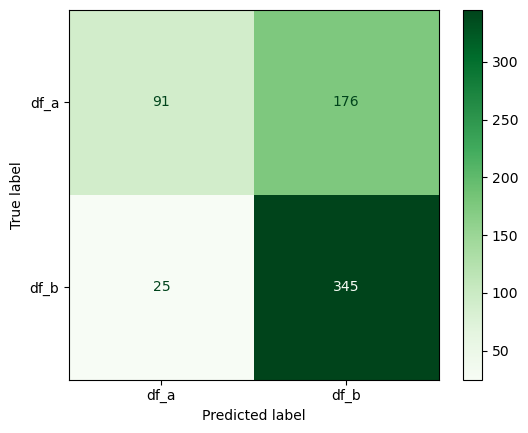

In [118]:
run_rf(X_train1, X_test1, y_train1, y_test1, 10, 150)

Metrics on train
Accuracy Score:  0.981151832460733
Precision Score:  0.9683098591549296
Recall Score:  1.0
F1 Score:  0.9838998211091236

Metrics on Test
Accuracy Score:  0.7142857142857143
Precision Score:  0.7052401746724891
Recall Score:  0.8729729729729729
F1 Score:  0.7801932367149759

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590431e+00, -3.9636185e+00, -3.8725657e+00, ...,
         -3.1473473e-01,  1.2638414e-01,  4.9055222e-02],
        [ 7.5333366e+01, -1.4135914e+00,  1.0309186e+01, ...,
         -8.6910808e-01,  1.3242251e-01,  1.1833317e+00],
        [ 9.7879341e+01,  1.2840347e+00, -1.9614090e+01, ...,
         -1.4691257e-01,  5.6516123e-01,  3.7798056e-01],
        ...,
        [-2.0550980e-01,  1.0660333e+01,  8.1803408e+00, ...,
          1.8366821e+00,  3.5998797e-01, -3.8957784e-01],
        [ 1.2308116e+01, -2.4970019e+00, -1.8133155e+00, ...,
         -1.8419220e+00,  1.6850126e-01, -9.2147976e-01],
        [-1.1036507e-01, -1.8688396e+01,  3.8715682e+00, ...,
          2.4752071e+00, -1.5106088e+00, -6.7903852e-01]], dtype=float32),
 array([[-1.5165133e+01,  5.8113772e-01,  1.3378704e-01, ...,
         -5.4140079e-01, -3.6525223e-02, -1.1821667e-01],
        [-1.4266337e-02, -2.5690999e+00,  3.0585854e+00, ...,
         -5.3501916e-01,  3.5595424e-02, -1.0407853e-01],
        [-

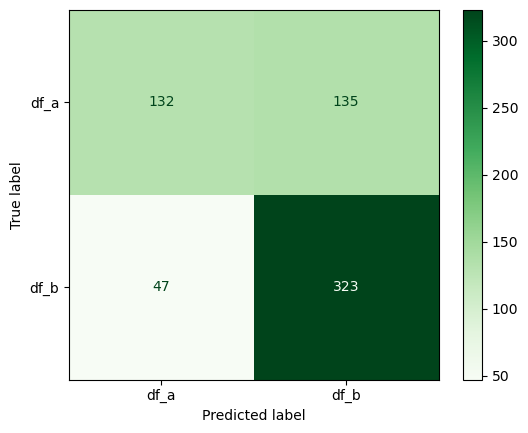

In [124]:
### Set max_features to 200
run_rf(X_train1, X_test1, y_train1, y_test1, 10, 150)

Metrics on train
Accuracy Score:  0.9806282722513089
Precision Score:  0.9674582233948988
Recall Score:  1.0
F1 Score:  0.9834599910594547

Metrics on Test
Accuracy Score:  0.6436420722135008
Precision Score:  0.6421471172962226
Recall Score:  0.8729729729729729
F1 Score:  0.7399770904925543

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590403e+00, -3.9636240e+00, -3.8725574e+00, ...,
          2.3722041e-01,  1.4110449e-01,  1.7516756e-01],
        [ 7.5333351e+01, -1.4135414e+00,  1.0309216e+01, ...,
         -6.8630296e-01,  7.6781988e-01,  6.8259186e-01],
        [ 9.7879326e+01,  1.2839864e+00, -1.9614100e+01, ...,
         -4.4813897e-02, -6.2732607e-01,  7.4653304e-01],
        ...,
        [-2.0550619e-01,  1.0660319e+01,  8.1803617e+00, ...,
          9.7327912e-01,  5.5282605e-01, -1.2533840e+00],
        [ 1.2308113e+01, -2.4969921e+00, -1.8133093e+00, ...,
          2.2722330e+00,  1.5503168e+00,  4.3067124e-01],
        [-1.1035967e-01, -1.8688379e+01,  3.8715596e+00, ...,
         -3.1361830e-01, -1.6356149e+00,  1.4468515e-01]], dtype=float32),
 array([[-1.5165130e+01,  5.8112752e-01,  1.3378537e-01, ...,
         -2.5934306e-01, -1.2694019e-02,  7.5223780e-01],
        [-1.4265176e-02, -2.5691006e+00,  3.0585907e+00, ...,
         -6.1118037e-01,  1.1969150e-01,  5.0158781e-01],
        [-

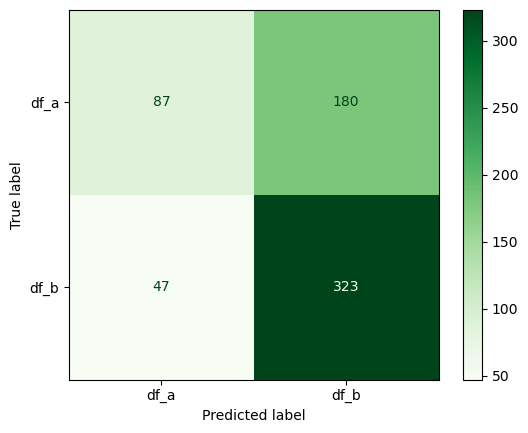

In [106]:
run_rf(X_train1, X_test1, y_train1, y_test1, 10, 50)

Metrics on train
Accuracy Score:  0.9178010471204189
Precision Score:  0.8750994431185362
Recall Score:  1.0
F1 Score:  0.9333899024183283

Metrics on Test
Accuracy Score:  0.6766091051805337
Precision Score:  0.648014440433213
Recall Score:  0.9702702702702702
F1 Score:  0.777056277056277

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.35904026e+00, -3.96362901e+00, -3.87255001e+00, ...,
         -4.45855975e-01,  3.97325046e-02,  1.24065645e-01],
        [ 7.53333664e+01, -1.41355217e+00,  1.03091698e+01, ...,
          2.47816458e-01, -4.32651758e-01,  1.50366575e-01],
        [ 9.78793335e+01,  1.28396571e+00, -1.96140175e+01, ...,
         -1.64880455e-01,  2.12205555e-02,  2.10201502e-01],
        ...,
        [-2.05509946e-01,  1.06603346e+01,  8.18035126e+00, ...,
          1.83036566e-01,  1.01273167e+00,  7.50898197e-02],
        [ 1.23081150e+01, -2.49700165e+00, -1.81331825e+00, ...,
          7.90114030e-02,  1.74829423e+00,  3.31041694e+00],
        [-1.10364184e-01, -1.86883755e+01,  3.87158108e+00, ...,
          1.84444237e+00,  3.22451703e-02,  1.12374806e+00]], dtype=float32),
 array([[-1.51651297e+01,  5.81132829e-01,  1.33789033e-01, ...,
          2.02950500e-02, -2.52220571e-01,  1.56011224e-01],
        [-1.42667294e-02, -2.56909776e+00,  3.05861521e+00, ...,
         -3.76288369e-0

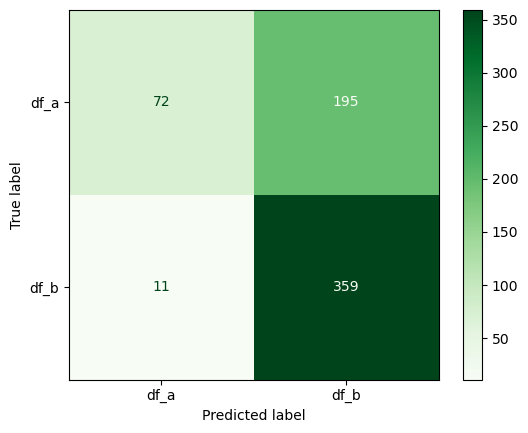

In [107]:
run_rf(X_train1, X_test1, y_train1, y_test1, 7, 150)

Metrics on train
Accuracy Score:  0.9790575916230366
Precision Score:  0.9649122807017544
Recall Score:  1.0
F1 Score:  0.9821428571428572

Metrics on Test
Accuracy Score:  0.6718995290423861
Precision Score:  0.6466302367941712
Recall Score:  0.9594594594594594
F1 Score:  0.7725788900979325

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590412e+00, -3.9636319e+00, -3.8725514e+00, ...,
          1.4882983e-01,  6.6429056e-02,  3.4823066e-01],
        [ 7.5333351e+01, -1.4135327e+00,  1.0309227e+01, ...,
         -6.1652176e-02, -1.0158284e+00, -7.1138144e-01],
        [ 9.7879341e+01,  1.2839732e+00, -1.9614096e+01, ...,
         -9.3872122e-02,  4.5801491e-02,  7.9019330e-02],
        ...,
        [-2.0550680e-01,  1.0660351e+01,  8.1803341e+00, ...,
          4.1463104e-01, -1.9373354e-01, -1.4719372e+00],
        [ 1.2308116e+01, -2.4970057e+00, -1.8133217e+00, ...,
         -8.5201934e-02,  9.8964596e-01, -1.2066532e+00],
        [-1.1035809e-01, -1.8688372e+01,  3.8716207e+00, ...,
          6.6816282e-01, -3.1780794e-02, -6.9141857e-02]], dtype=float32),
 array([[-1.5165130e+01,  5.8113104e-01,  1.3379401e-01, ...,
          2.3582014e-01,  1.7037740e-01, -1.1776154e-01],
        [-1.4266454e-02, -2.5690968e+00,  3.0585840e+00, ...,
          2.8059617e-02, -3.5442305e-01,  2.1093248e-01],
        [-

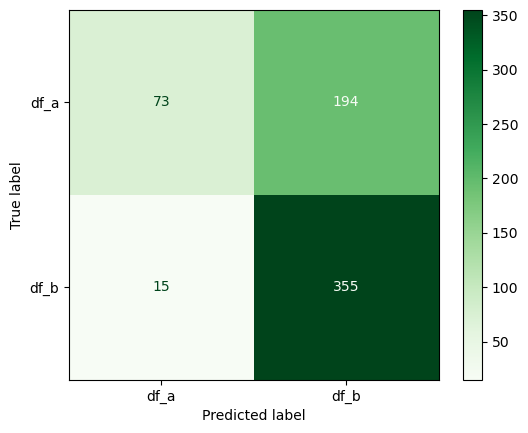

In [108]:
run_rf(X_train1, X_test1, y_train1, y_test1, 10, 300)

Metrics on train
Accuracy Score:  0.8303664921465969
Precision Score:  0.7724719101123596
Recall Score:  1.0
F1 Score:  0.8716323296354992

Metrics on Test
Accuracy Score:  0.6169544740973313
Precision Score:  0.6043046357615894
Recall Score:  0.9864864864864865
F1 Score:  0.7494866529774127

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590431e+00, -3.9636302e+00, -3.8725481e+00, ...,
         -2.1949604e-02,  7.0040831e-03, -1.4638365e-02],
        [ 7.5333366e+01, -1.4135338e+00,  1.0309155e+01, ...,
         -1.0383059e-02,  1.6099498e-01,  6.3801044e-01],
        [ 9.7879349e+01,  1.2839469e+00, -1.9614052e+01, ...,
          2.0579751e-01,  9.6954577e-02,  1.2318117e-02],
        ...,
        [-2.0550765e-01,  1.0660346e+01,  8.1803522e+00, ...,
         -1.0150542e+00,  7.9486877e-01,  5.1123935e-01],
        [ 1.2308117e+01, -2.4969993e+00, -1.8133205e+00, ...,
          1.3425856e+00,  5.1949686e-01,  2.1115172e+00],
        [-1.1036620e-01, -1.8688351e+01,  3.8715973e+00, ...,
          7.1132487e-01,  2.6258941e+00,  8.1246662e-01]], dtype=float32),
 array([[-1.51651316e+01,  5.81131041e-01,  1.33790880e-01, ...,
         -1.06660314e-01,  4.71784830e-01, -2.18217775e-01],
        [-1.42666586e-02, -2.56909442e+00,  3.05861545e+00, ...,
          4.29949537e-02,  2.64017254e-01,  2.26539783e-02]

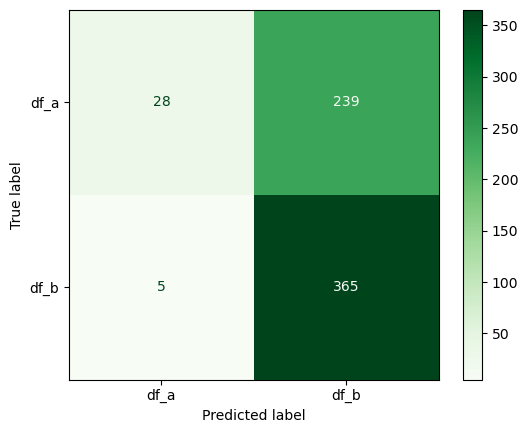

In [110]:
run_rf(X_train1, X_test1, y_train1, y_test1, 5, 300)

Metrics on train
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0

Metrics on Test
Accuracy Score:  0.6875981161695447
Precision Score:  0.6641074856046065
Recall Score:  0.9351351351351351
F1 Score:  0.77665544332211

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.35904026e+00, -3.96362710e+00, -3.87255716e+00, ...,
         -1.93092883e-01, -1.23311847e-01, -4.98560108e-02],
        [ 7.53333511e+01, -1.41355157e+00,  1.03091307e+01, ...,
         -1.75974166e+00,  5.21476448e-01,  4.11011070e-01],
        [ 9.78793335e+01,  1.28398502e+00, -1.96140022e+01, ...,
          2.97900617e-01,  4.23408002e-02, -1.45061938e-02],
        ...,
        [-2.05507085e-01,  1.06603184e+01,  8.18036366e+00, ...,
         -1.13704932e+00,  1.43082127e-01,  4.78453100e-01],
        [ 1.23081150e+01, -2.49699521e+00, -1.81333125e+00, ...,
         -2.04996079e-01,  2.96133131e-01, -3.91091257e-02],
        [-1.10361576e-01, -1.86883888e+01,  3.87157202e+00, ...,
          1.11825144e+00,  1.53434074e+00,  2.30811930e+00]], dtype=float32),
 array([[-1.5165130e+01,  5.8112824e-01,  1.3379344e-01, ...,
          3.4173194e-01, -1.4183109e-01, -6.7976725e-01],
        [-1.4267223e-02, -2.5691102e+00,  3.0586069e+00, ...,
         -5.8191168e-01,  7.0275

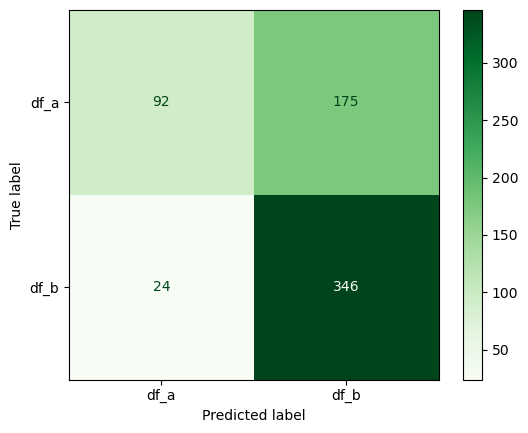

In [111]:
run_rf(X_train1, X_test1, y_train1, y_test1, 20, 300)

Metrics on train
Accuracy Score:  1.0
Precision Score:  1.0
Recall Score:  1.0
F1 Score:  1.0

Metrics on Test
Accuracy Score:  0.6797488226059655
Precision Score:  0.6788793103448276
Recall Score:  0.8513513513513513
F1 Score:  0.7553956834532375

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.35904217e+00, -3.96362615e+00, -3.87255263e+00, ...,
         -2.93788284e-01,  2.10250795e-01,  1.02737032e-01],
        [ 7.53333740e+01, -1.41354299e+00,  1.03091612e+01, ...,
          8.78253639e-01, -4.54241596e-02,  2.76053213e-02],
        [ 9.78793564e+01,  1.28396416e+00, -1.96140671e+01, ...,
         -1.61420166e-01,  4.64452028e-01, -9.13294554e-02],
        ...,
        [-2.05510452e-01,  1.06603365e+01,  8.18034840e+00, ...,
         -1.83719978e-01, -1.08632803e+00, -2.24589705e-01],
        [ 1.23081160e+01, -2.49700403e+00, -1.81331503e+00, ...,
          1.34104252e+00,  8.21551383e-01, -8.83534431e-01],
        [-1.10359184e-01, -1.86883774e+01,  3.87160254e+00, ...,
          3.19181252e+00,  2.73678094e-01, -1.42170295e-01]], dtype=float32),
 array([[-1.5165133e+01,  5.8112782e-01,  1.3379581e-01, ...,
          3.3868831e-01,  2.7559248e-01, -4.1712722e-01],
        [-1.4265278e-02, -2.5690980e+00,  3.0585933e+00, ...,
         -3.6799419e-01, -2.4509

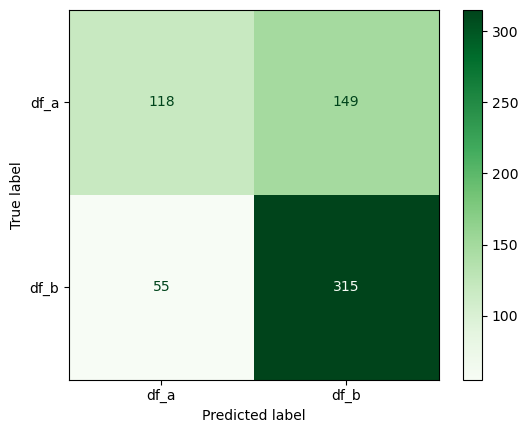

In [112]:
run_rf(X_train1, X_test1, y_train1, y_test1, 20, 50)

Metrics on train
Accuracy Score:  0.8089005235602095
Precision Score:  0.7515400410677618
Recall Score:  0.9981818181818182
F1 Score:  0.8574775478328778

Metrics on Test
Accuracy Score:  0.6153846153846154
Precision Score:  0.6053962900505903
Recall Score:  0.9702702702702702
F1 Score:  0.7455867082035308

Dummy metrics
Accuracy Score:  0.5808477237048666
Precision Score:  0.5808477237048666
Recall Score:  1.0
F1 Score:  0.7348560079443893


(array([[-8.3590431e+00, -3.9636264e+00, -3.8725557e+00, ...,
          1.9466870e-02, -1.0829809e-01, -4.4978201e-01],
        [ 7.5333374e+01, -1.4135637e+00,  1.0309237e+01, ...,
         -2.3197384e-01,  8.1751503e-02,  9.4035167e-01],
        [ 9.7879356e+01,  1.2839729e+00, -1.9614136e+01, ...,
         -6.4244971e-02,  4.3574047e-01, -1.4384776e-01],
        ...,
        [-2.0550783e-01,  1.0660331e+01,  8.1803532e+00, ...,
         -4.1212475e-01,  4.3983412e-01, -1.4565530e+00],
        [ 1.2308116e+01, -2.4970012e+00, -1.8132977e+00, ...,
         -1.3678589e-01,  2.1781273e+00, -1.1392125e+00],
        [-1.1035942e-01, -1.8688366e+01,  3.8715687e+00, ...,
         -1.6208615e+00, -4.4562299e-02,  1.3441869e+00]], dtype=float32),
 array([[-1.51651316e+01,  5.81131518e-01,  1.33781537e-01, ...,
         -2.15760440e-01, -9.31529999e-02, -5.99612713e-01],
        [-1.42663904e-02, -2.56910253e+00,  3.05857992e+00, ...,
         -2.29705036e-01, -8.53905380e-01, -6.56001627e-01]

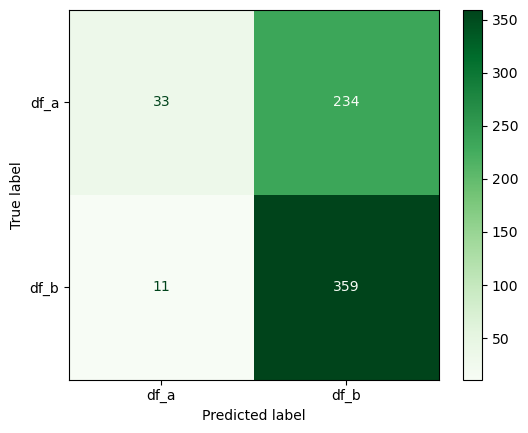

In [113]:
run_rf(X_train1, X_test1, y_train1, y_test1, 5, 50)